In [873]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv


In [874]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  , precision_score , recall_score 

In [875]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Overview Of Data

In [876]:
df=pd.read_csv("/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv")

In [877]:
df.shape

(614, 13)

In [878]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [879]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [880]:
df.duplicated().sum()

0

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [882]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [883]:
cat=df.select_dtypes(include="object")

In [884]:
cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [885]:
num=df.select_dtypes(exclude="object")

In [886]:
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


# Data Preprocessing and Exploratory Data Analysis

In [887]:
df=df.drop("Loan_ID" , axis=1)

In [888]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


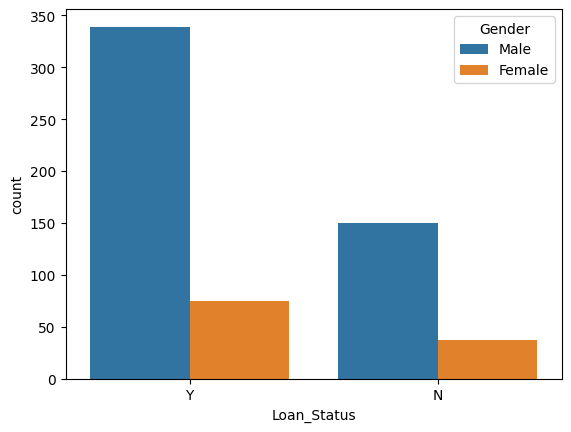

In [889]:
sns.countplot(x="Loan_Status" , hue="Gender" , data=df)
plt.show()

In [890]:
# Gender Column have 13 Null Value We will Analize and fill it

In [891]:
df.isnull().sum()["Gender"]

13

In [892]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

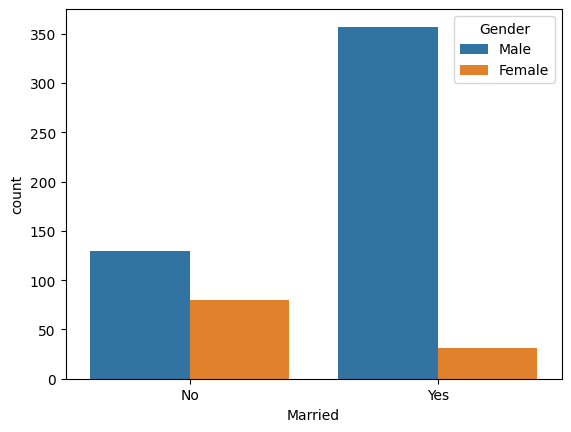

In [893]:
sns.countplot(x="Married" , hue="Gender" , data=df)
plt.show()

In [894]:
# If the person is married  there is lot of chances of person being male

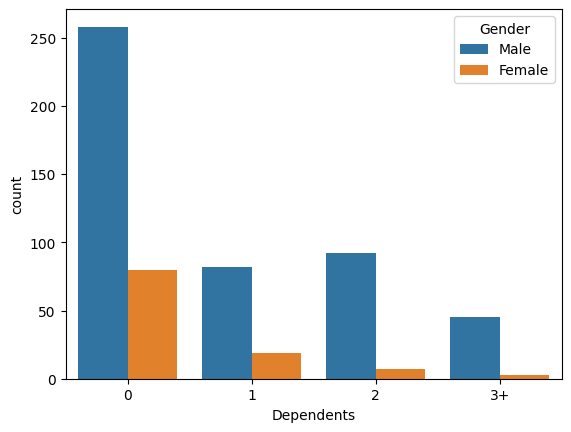

In [895]:
sns.countplot(x="Dependents" , hue="Gender" , data=df)
plt.show()

In [896]:
# if the Dependents is 3+  , there is lot of chances it will be men , if the dependents is 3+ and its merried  we will fill it male

In [897]:
mask = (df["Dependents"] == "3+") & (df["Married"] == "Yes") & (df["Gender"].isnull())
df.loc[mask, "Gender"] = "Male"

In [898]:
# We have Filled tw null values of Gender

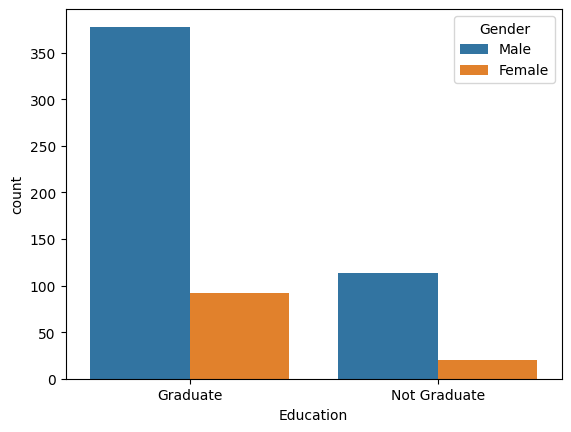

In [899]:
sns.countplot(x="Education" , hue="Gender" , data=df)
plt.show()

In [900]:
# if the person is not graduated  and Dependent is not 3+   so we can consider Female 

In [901]:
mask2=(df["Education"]!="Graduate") & (df["Dependents"]!="3+") & (df["Gender"].isnull())

In [902]:
df.loc[mask2 ,"Gender"]="Female"

In [903]:
df["Gender"].isnull().sum()

10

In [904]:
def plot(text):
    sns.countplot(x=text , hue="Gender" , data=df)

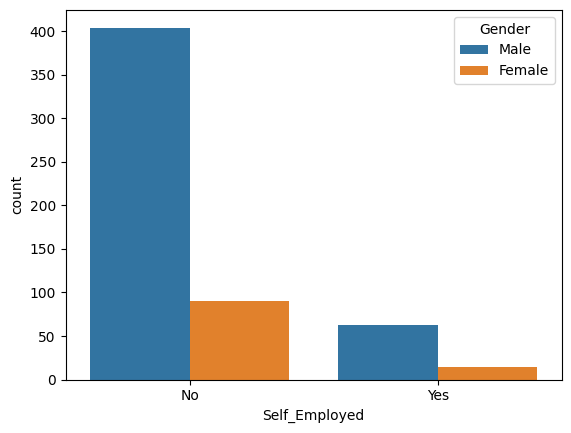

In [905]:
plot("Self_Employed")

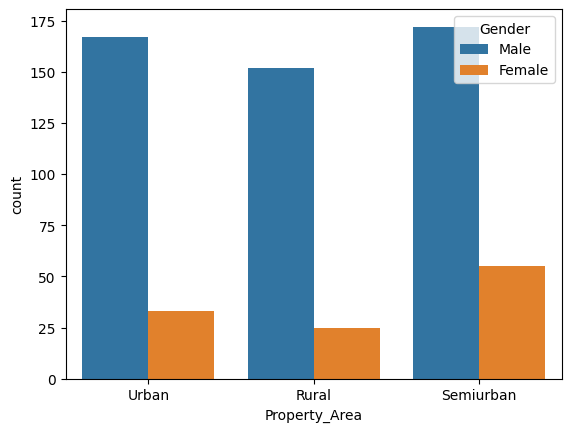

In [906]:
plot("Property_Area")

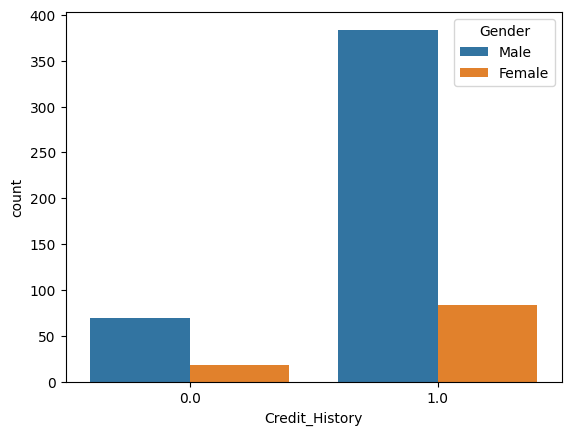

In [907]:
plot("Credit_History")

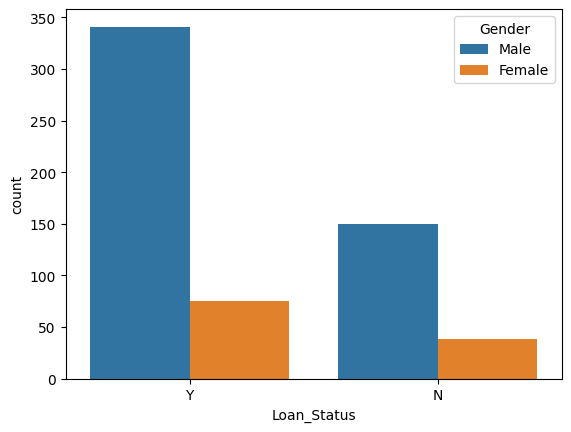

In [908]:
plot("Loan_Status")

In [909]:
# if the loan Status Aprove and  credit history is one and  self emlpoved no  then its male 

In [910]:
df[(df["Loan_Status"]=="Y") & (df["Credit_History"]==1.0)  & (df["Gender"].isnull())]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
588,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y


In [911]:
mask3=(df["Loan_Status"]=="Y") & (df["Credit_History"]==1.0)  & (df["Gender"].isnull())

In [912]:
df.loc[mask3 , "Gender"]="Male"

In [913]:
df["Gender"]=df["Gender"].fillna("Female")

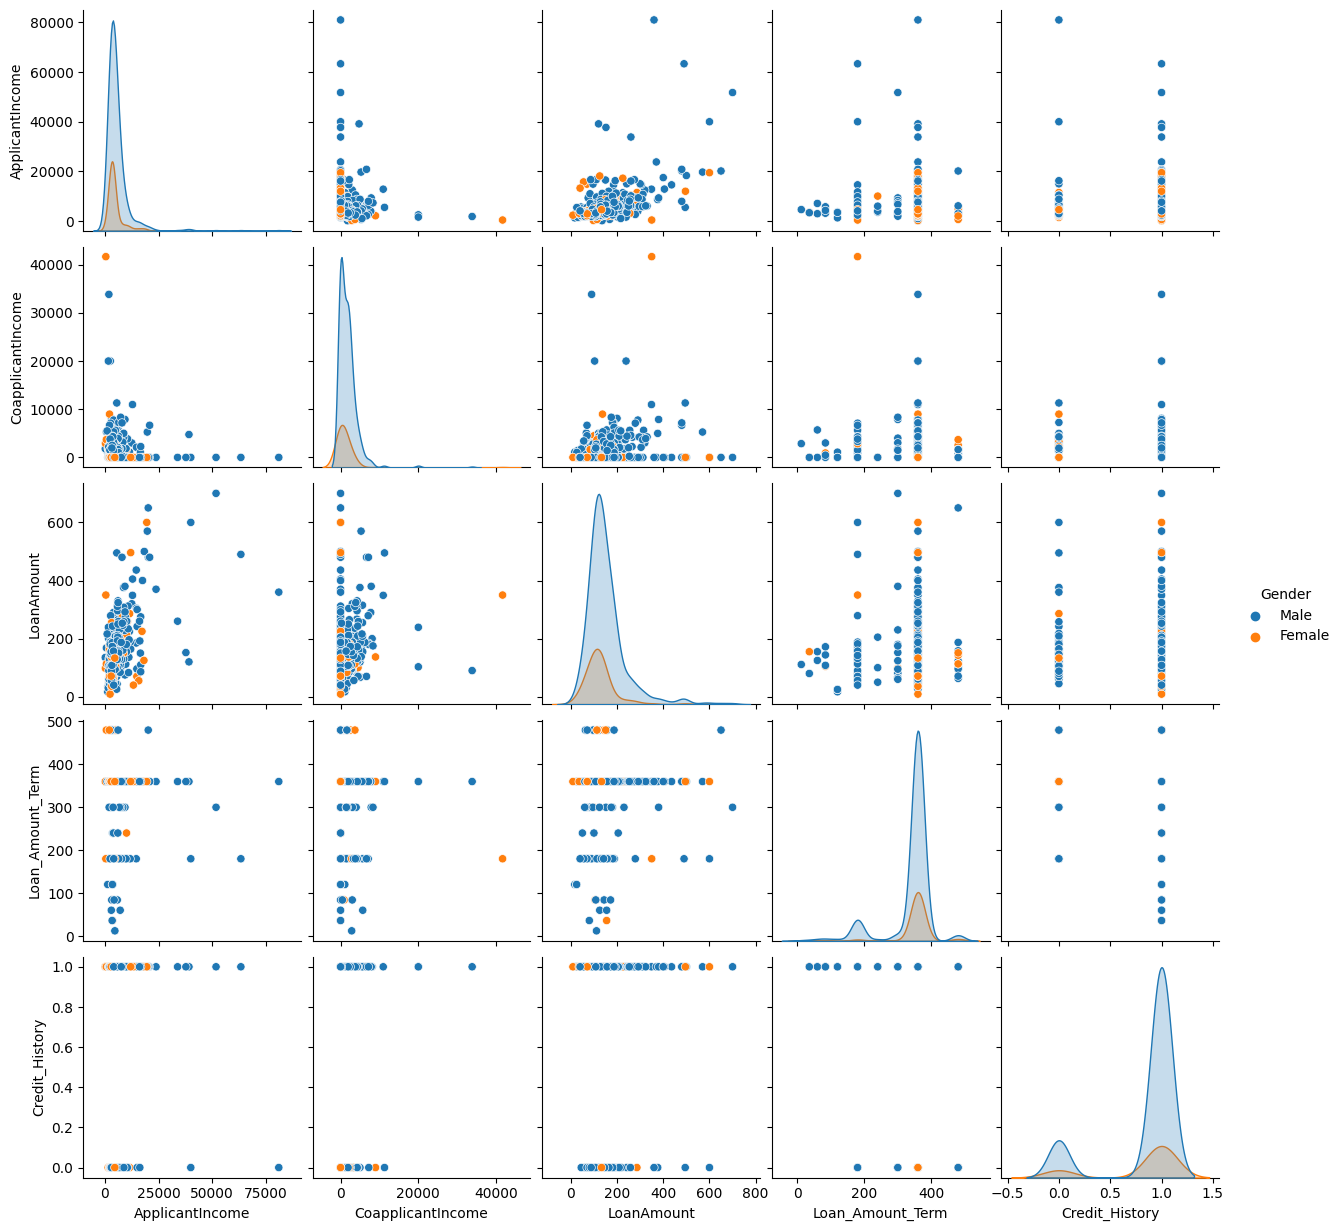

In [914]:
sns.pairplot(df , hue="Gender")

In [915]:
# Merried Column Also Have Null Value

In [916]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [917]:
df[df["Married"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


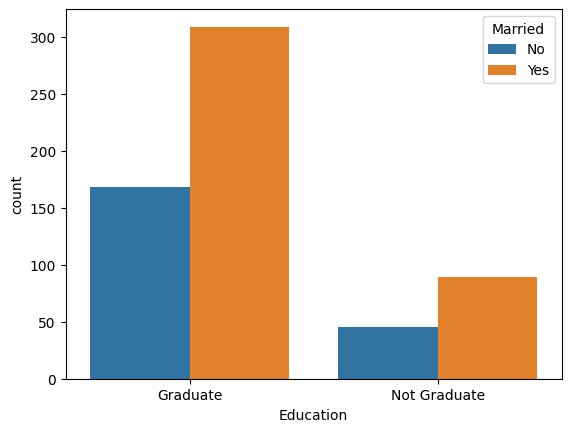

In [918]:
sns.countplot(x="Education" ,  hue="Married" , data=df)
plt.show()

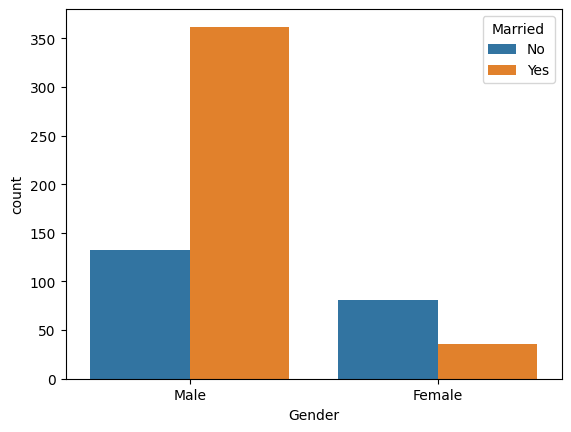

In [919]:
sns.countplot(x="Gender" ,  hue="Married" , data=df)
plt.show()
# Here Picture is clear  if the gender is male its Married  and Female its single

In [920]:
mask4=(df["Married"].isnull()) & (df["Gender"]=="Male")

In [921]:
df.loc[mask4 , "Married"]="Yes"

In [922]:
df["Married"]=df["Married"].fillna("No")

In [923]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [924]:
#now Dependents also have Null values we have to fix it 

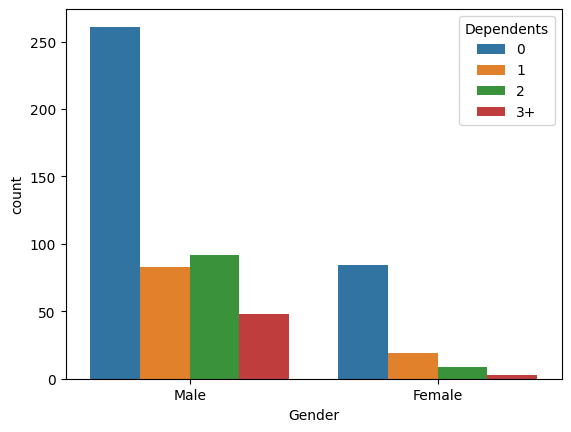

In [925]:
sns.countplot(x="Gender" ,  hue="Dependents" , data=df)
plt.show()
# Here Picture is clear  if the gender is male its Married  and Female its single

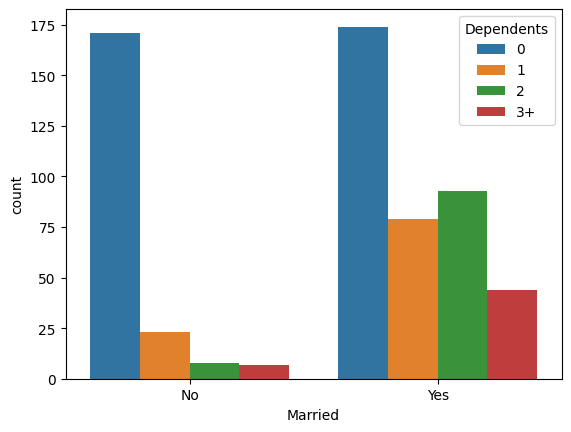

In [926]:
sns.countplot(x="Married" ,  hue="Dependents" , data=df)
plt.show()
# Here Picture is clear  if the gender is male its Married  and Female its single

In [927]:
#With the help of above two graph , we can say 1) if Gender is Female and she is Single it will be a 3+ Dependents

In [928]:
mask5=(df["Dependents"].isnull()) &  (df["Gender"]=="Female") & (df["Married"]=="No")

In [929]:
df.loc[mask5 , "Dependents"]="3+"

In [930]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


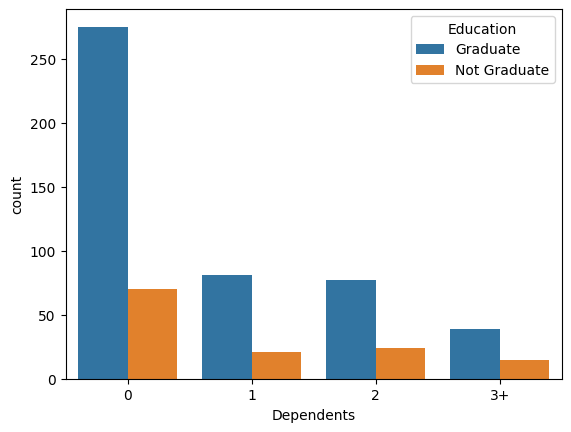

In [931]:
sns.countplot(x="Dependents" ,  hue="Education" , data=df)
plt.show()

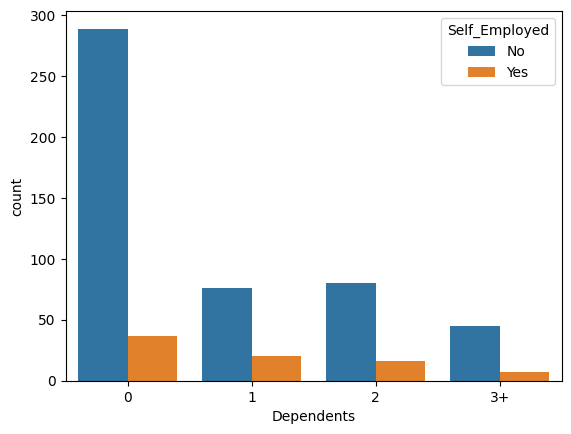

In [932]:
sns.countplot(x="Dependents" ,  hue="Self_Employed" , data=df)
plt.show()

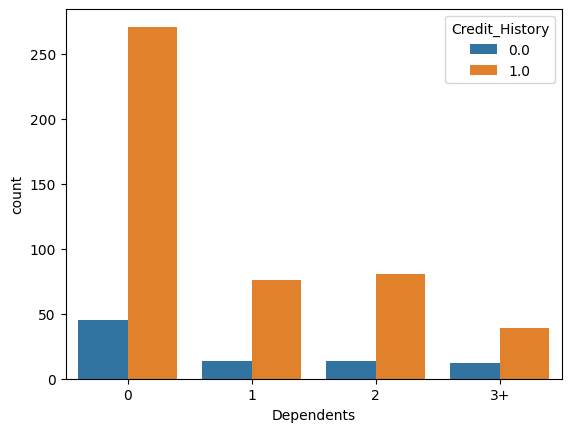

In [933]:
sns.countplot(x="Dependents" ,  hue="Credit_History" , data=df)
plt.show()

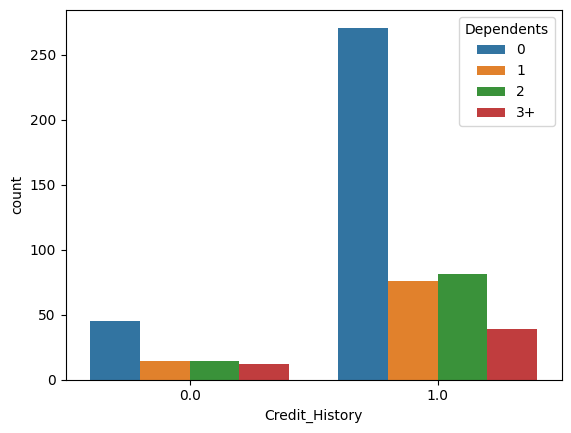

In [934]:
sns.countplot(x="Credit_History" ,  hue="Dependents" , data=df)
plt.show()
# if the credit score is 1 dependent is zero

In [935]:
mask6=(df["Dependents"].isnull()) & (df["Credit_History"]==1.0)

In [936]:
df.loc[mask6 , "Dependents"]="1"

In [937]:
df.isnull().sum()

Gender                0
Married               0
Dependents            4
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

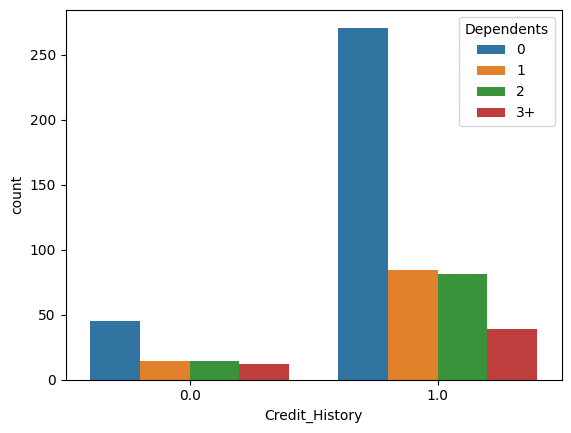

In [938]:
sns.countplot(x="Credit_History" ,  hue="Dependents" , data=df)
plt.show()
# if the credit score is 1 dependent is zero

In [939]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [940]:
df.groupby("Dependents")["LoanAmount"].mean()

Dependents
0     135.886228
1     156.447619
2     150.224490
3+    188.490196
Name: LoanAmount, dtype: float64

In [941]:
sam1=(df["LoanAmount"].isnull()) & (df["Dependents"]=="0")
sam2=(df["LoanAmount"].isnull()) & (df["Dependents"]=="1")
sam3=(df["LoanAmount"].isnull()) & (df["Dependents"]=="2")
sam4=(df["LoanAmount"].isnull()) & (df["Dependents"]=="3+")

In [942]:
df.loc[sam1 , "LoanAmount"]=135
df.loc[sam2 , "LoanAmount"]=156
df.loc[sam3 , "LoanAmount"]=150
df.loc[sam4 , "LoanAmount"]=188

In [943]:
# now remaining Nan of dependents we will fill with mode

In [944]:
df["Dependents"]=df["Dependents"].fillna("0")

In [945]:
# Here all null values filled  , lets see another column

<Axes: xlabel='Self_Employed', ylabel='count'>

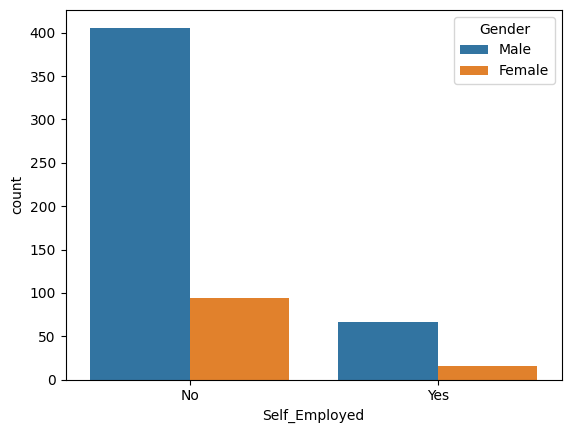

In [946]:
sns.countplot( x="Self_Employed" , hue="Gender" , data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

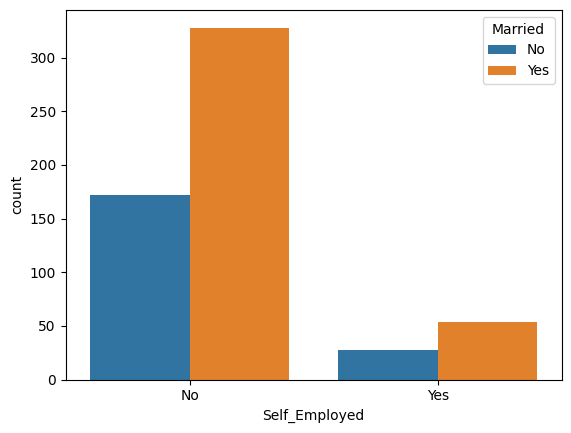

In [947]:
sns.countplot( x="Self_Employed" , hue="Married" , data=df)

In [948]:
mask7=(df["Gender"]=="Male") & (df["Married"]=="Yes") & (df["Self_Employed"].isnull())

In [949]:
df.loc[ mask7 , "Self_Employed"]="No"

<Axes: xlabel='Self_Employed', ylabel='count'>

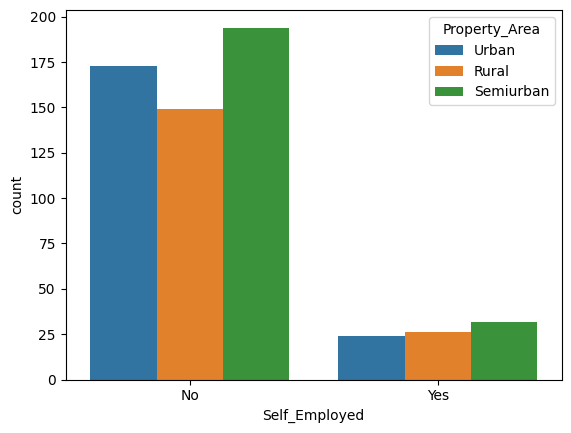

In [950]:
sns.countplot( x="Self_Employed" , hue="Property_Area" , data=df)
# if the person from a rural most probably its a Self Employed and if the person from urban No self employed

In [951]:
mask8=(df["Self_Employed"].isnull()) & (df["Property_Area"]=="Rural")

In [952]:
df.loc[mask8 , "Self_Employed"]="Yes"

In [953]:
mask9=(df["Self_Employed"].isnull()) & (df["Property_Area"]=="Urban")

In [954]:
df.loc[mask9 , "Self_Employed"]="No"

<Axes: xlabel='Self_Employed', ylabel='count'>

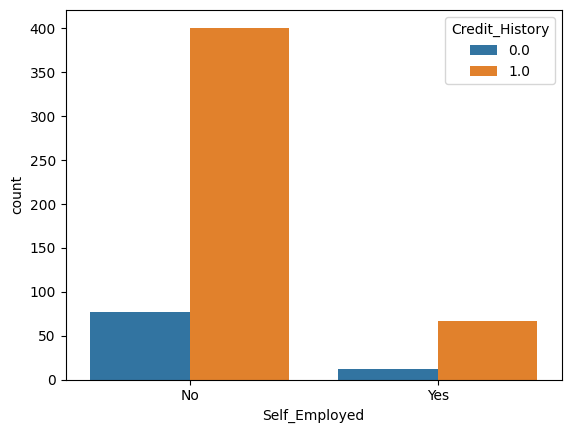

In [955]:
sns.countplot( x="Self_Employed" , hue="Credit_History" , data=df)

In [956]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,135.0,360.0,1.0,Urban,Y


<Axes: xlabel='Education', ylabel='count'>

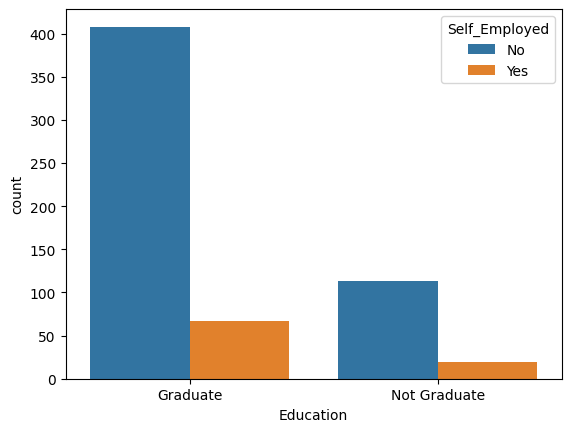

In [957]:
sns.countplot( x="Education" , hue="Self_Employed"  , data=df)

<Axes: xlabel='Gender', ylabel='count'>

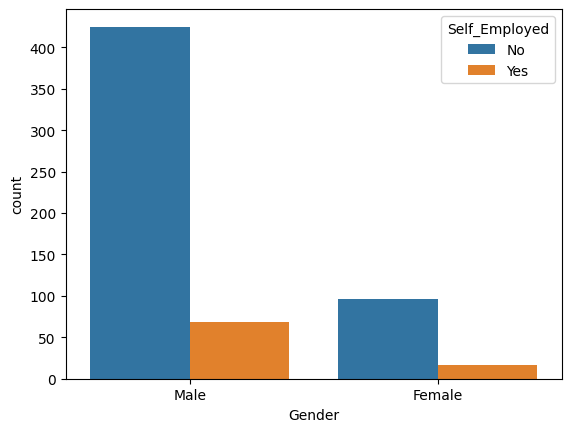

In [958]:
sns.countplot( x="Gender" , hue="Self_Employed"  , data=df)

In [959]:
# Now we The help of numeric column we will try  to fill it 

In [960]:
df.groupby("Self_Employed")["ApplicantIncome"].mean()

Self_Employed
No     5110.476008
Yes    7226.837209
Name: ApplicantIncome, dtype: float64

In [961]:
df.groupby("Self_Employed")["CoapplicantIncome"].mean()

Self_Employed
No     1652.354933
Yes    1479.476744
Name: CoapplicantIncome, dtype: float64

In [962]:
df[df["Self_Employed"].isnull()]
#if the ApplicantIncome value is near to close to mean of self employed ApplicantIncome then its self employed 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
432,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
463,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,Y
468,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
542,Female,No,1,Graduate,NaN,3652,0.0,95.0,360.0,1.0,Semiurban,Y


In [963]:
mask10=(df["Self_Employed"].isnull()) & (df["CoapplicantIncome"]==0.0)

In [964]:
df.loc[mask10 , "Self_Employed"]="Yes"

In [965]:
df["Self_Employed"]=df["Self_Employed"].fillna("No")

In [966]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

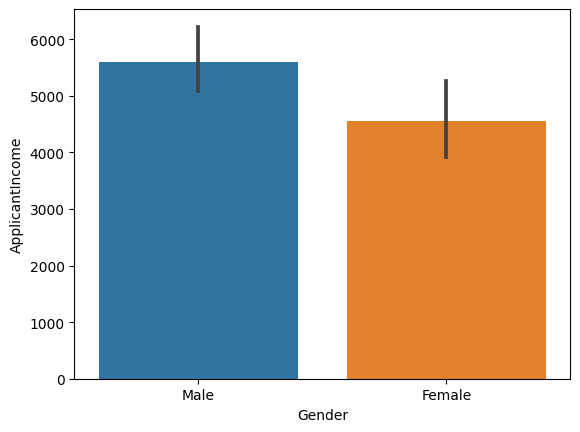

In [967]:
sns.barplot(x="Gender" , y="ApplicantIncome"  , data=df)

<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

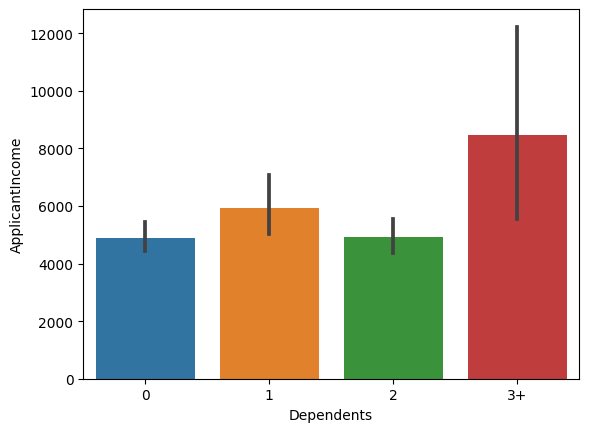

In [968]:
sns.barplot(x="Dependents" , y="ApplicantIncome"  , data=df)
# here is co relation seen between applicant income and Dependents

In [969]:
df.groupby("Dependents")["ApplicantIncome"].mean()

Dependents
0     4903.183381
1     5927.172727
2     4926.782178
3+    8461.462963
Name: ApplicantIncome, dtype: float64

In [970]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [971]:
df["ApplicantIncome"]=df["ApplicantIncome"].fillna(df["ApplicantIncome"].mean())

In [972]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

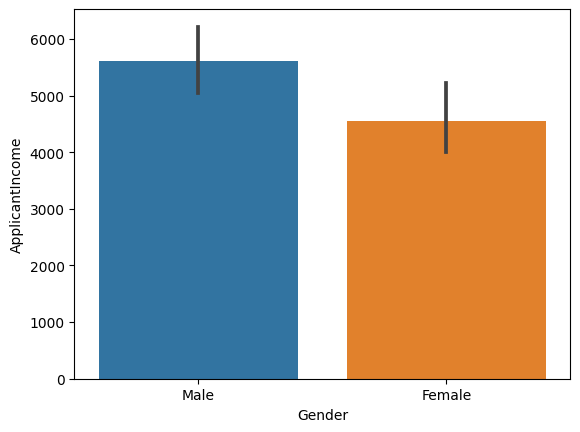

In [973]:
sns.barplot(x="Gender" , y="ApplicantIncome"  , data=df)

<Axes: xlabel='Married', ylabel='ApplicantIncome'>

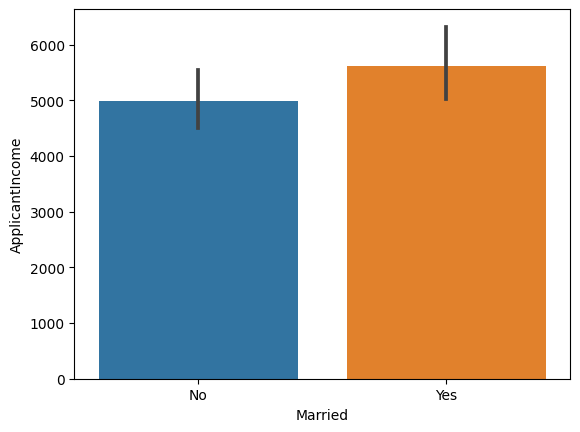

In [974]:
sns.barplot(x="Married" , y="ApplicantIncome"  , data=df)

<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

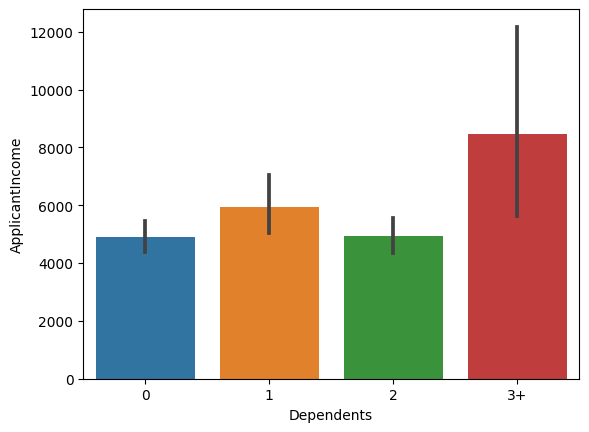

In [975]:
sns.barplot(x="Dependents" , y="ApplicantIncome"  , data=df)

<Axes: xlabel='Dependents', ylabel='Loan_Amount_Term'>

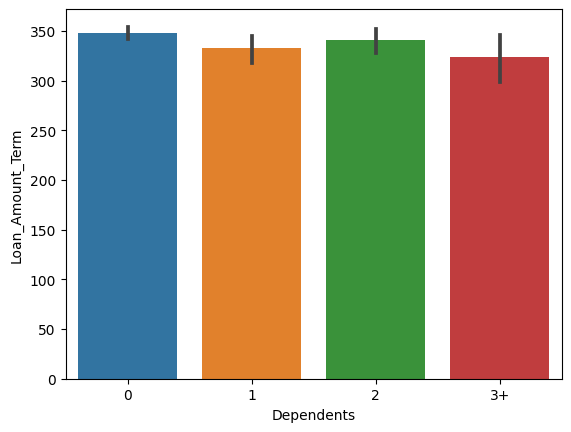

In [976]:
sns.barplot(x="Dependents" , y="Loan_Amount_Term"  , data=df)

<Axes: xlabel='Gender', ylabel='Loan_Amount_Term'>

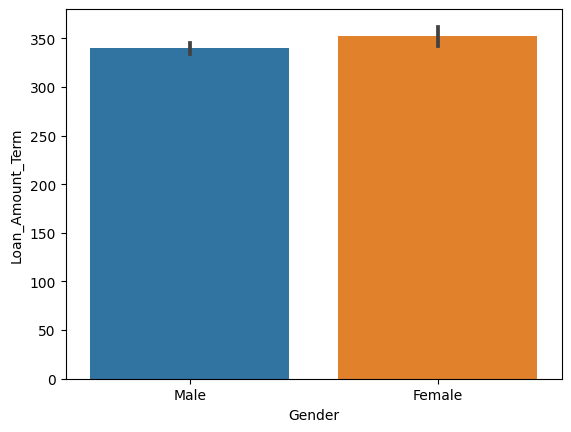

In [977]:
sns.barplot(x="Gender" , y="Loan_Amount_Term"  , data=df)

<Axes: xlabel='Gender', ylabel='Loan_Amount_Term'>

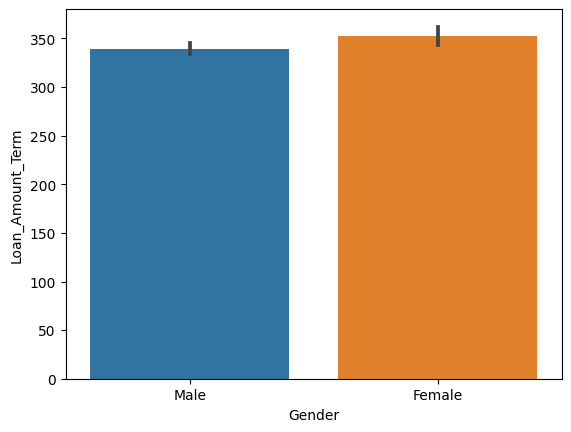

In [978]:
sns.barplot(x="Gender" , y="Loan_Amount_Term"  , data=df)

<Axes: xlabel='Education', ylabel='Loan_Amount_Term'>

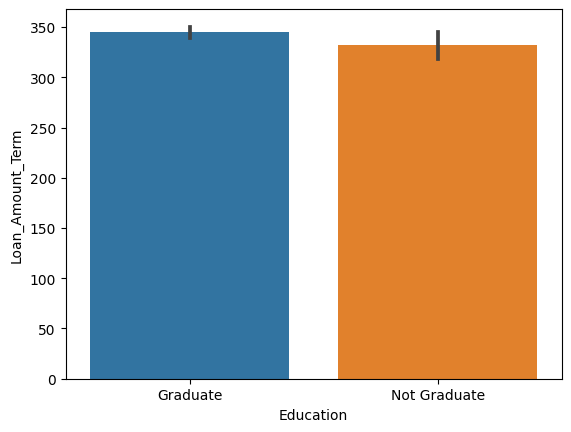

In [979]:
sns.barplot(x="Education" , y="Loan_Amount_Term"  , data=df)

<Axes: xlabel='Credit_History', ylabel='Loan_Amount_Term'>

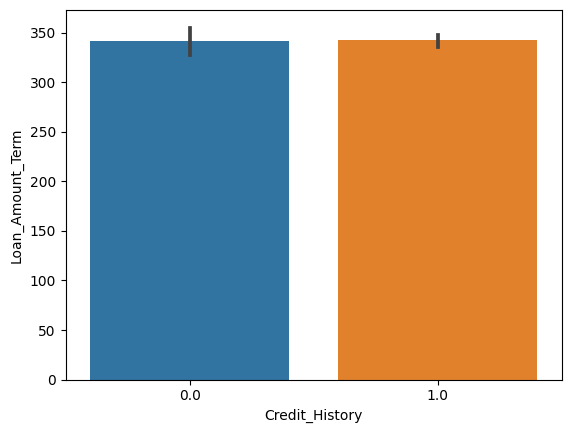

In [980]:
sns.barplot(x="Credit_History" , y="Loan_Amount_Term"  , data=df)

<Axes: xlabel='Property_Area', ylabel='Loan_Amount_Term'>

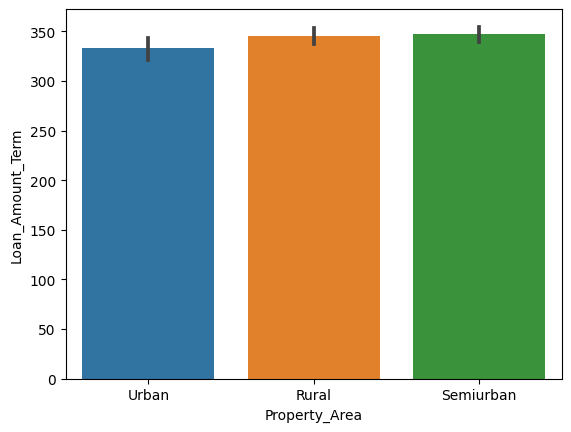

In [981]:
sns.barplot(x="Property_Area" , y="Loan_Amount_Term"  , data=df)

In [982]:
df.groupby("Property_Area")["Loan_Amount_Term"].mean()

Property_Area
Rural        345.531429
Semiurban    347.113043
Urban        332.800000
Name: Loan_Amount_Term, dtype: float64

In [983]:
sam2=(df["Loan_Amount_Term"].isnull()) & (df["Property_Area"]=="Rural")
sam3=(df["Loan_Amount_Term"].isnull()) & (df["Property_Area"]=="Semiurban")
sam4=(df["Loan_Amount_Term"].isnull()) & (df["Property_Area"]=="Urban")

In [984]:
df.loc[sam2 , "Loan_Amount_Term"]=345
df.loc[sam3 , "Loan_Amount_Term"]=347
df.loc[sam4 , "Loan_Amount_Term"]=332

# Fixing null values with Machine Learning algorithm

In [985]:
df.isnull().sum()
# in Credit History we have 50 Null Value we will fix it with algorithm

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [986]:
df.shape

(614, 12)

In [987]:
test50=df[df["Credit_History"].isnull()]

In [988]:
temp_df=df.dropna()

In [989]:
x=temp_df.drop("Credit_History" , axis=1)
y=temp_df["Credit_History"]

In [990]:
x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,135.0,360.0,Urban,Y


In [991]:
ohe=OneHotEncoder()

In [992]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [993]:
step1=ColumnTransformer(transformers=([
    ("one_hot" , ohe , [0,1,2,3,4,9,10])   
    
]))

In [994]:
from sklearn.tree import DecisionTreeClassifier

In [995]:
dtc=DecisionTreeClassifier()

In [996]:
pipe=Pipeline([
    ("step1" , step1),
    ("step2" , dtc)
])

In [997]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 9, 10])])),
                ('step2', DecisionTreeClassifier())])

In [998]:
y_pred=pipe.predict(x_test)

In [999]:
accuracy_score(y_test , y_pred)

0.7787610619469026

In [1000]:
test50=test50.drop("Credit_History" , axis=1)

In [1001]:
predictions=pipe.predict(test50).reshape(-1,1)

In [1002]:
test50["Credit_History"]=predictions

In [1003]:
df.shape

(614, 12)

In [1004]:
temp_df=df.dropna()

In [1005]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,135.0,360.0,1.0,Urban,Y


In [1006]:
test50=test50[["Gender" ,"Married","Dependents","Education","Self_Employed" , "ApplicantIncome" ,"CoapplicantIncome","LoanAmount" , "Loan_Amount_Term" , "Credit_History" , "Property_Area" , "Loan_Status"]]

In [1007]:
test50.shape , temp_df.shape , 564+50

((50, 12), (564, 12), 614)

In [1008]:
final_df=pd.concat([test50 , temp_df]).sample(614 , random_state=353)

In [1009]:
final_df.shape

(614, 12)

In [1010]:
# Now Whole Null Values Have Remove

# Exploratary Data Analysis

In [1011]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,135.0,360.0,1.0,Urban,Y


In [1012]:
def countplot(col):
    sns.countplot(x=col , hue="Loan_Status" , data=df)

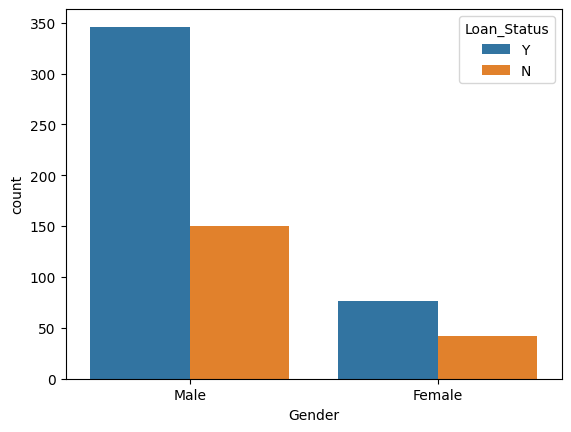

In [1013]:
countplot("Gender")

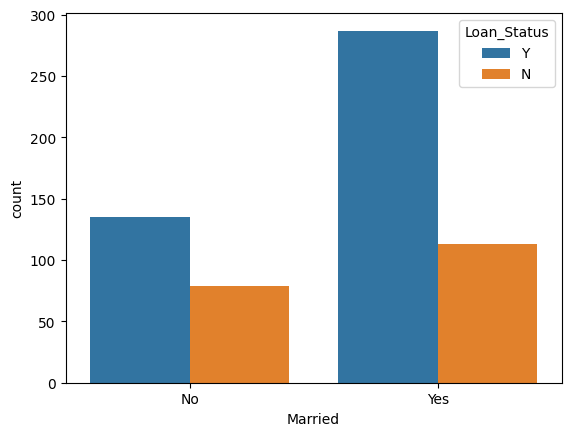

In [1014]:
countplot("Married")

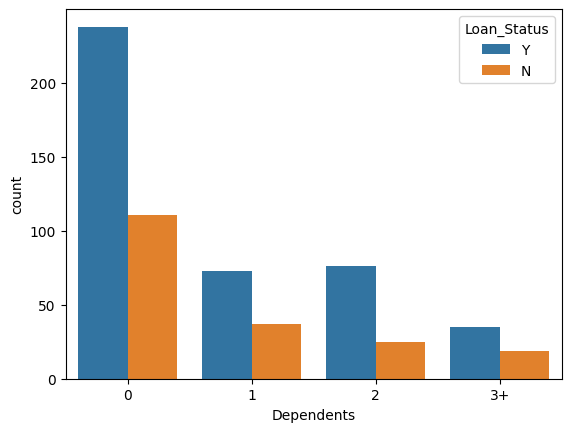

In [1015]:
countplot("Dependents")

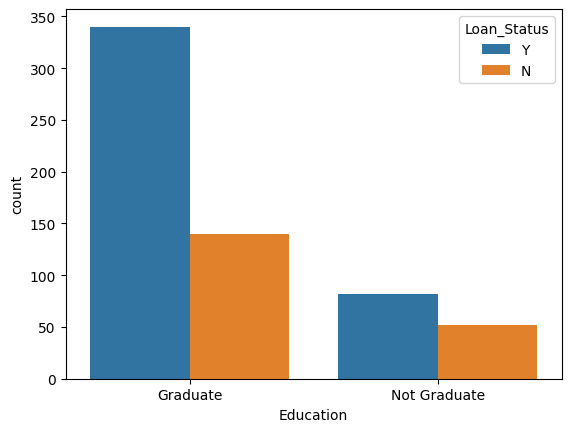

In [1016]:
countplot("Education")

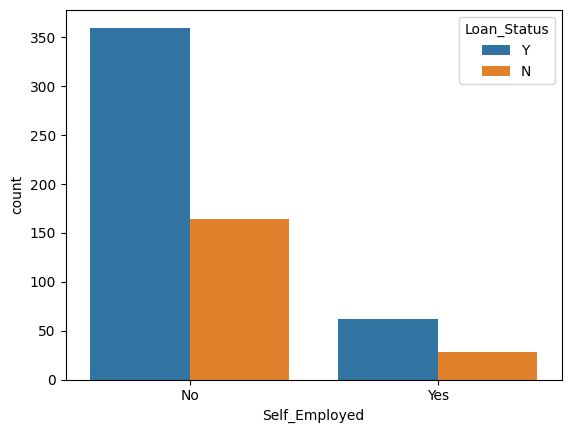

In [1017]:
countplot("Self_Employed")

In [1018]:
def barplot(text):
    sns.barplot(x="Loan_Status" , y=text , data=df)

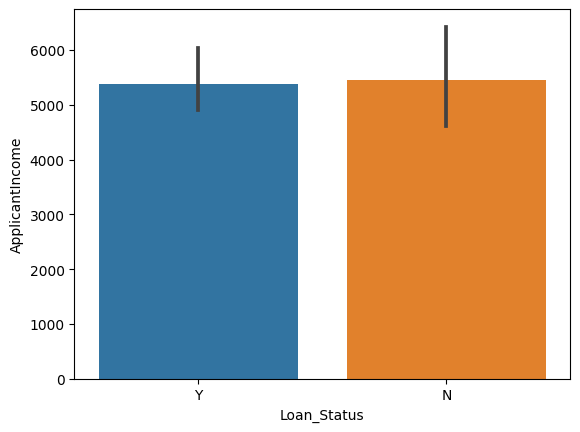

In [1019]:
barplot("ApplicantIncome")

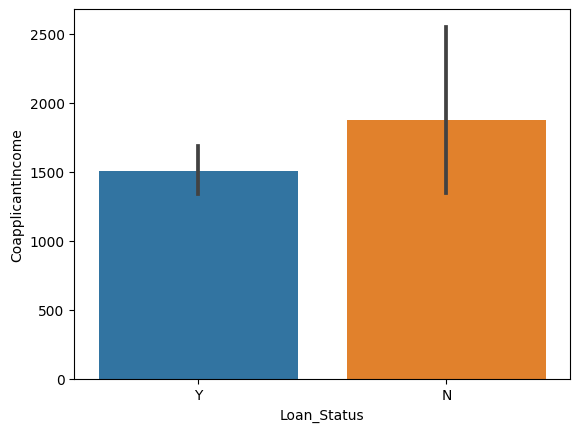

In [1020]:
barplot("CoapplicantIncome")

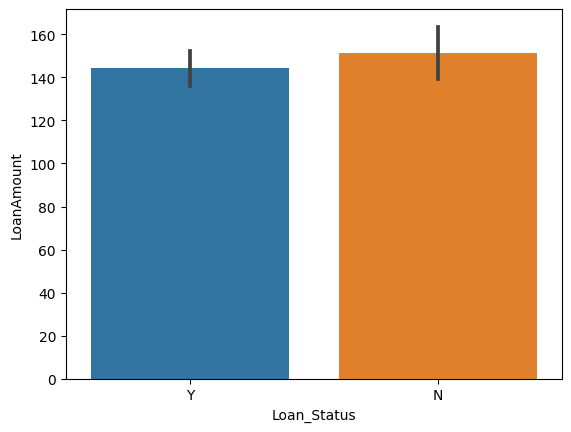

In [1021]:
barplot("LoanAmount")

# Now Model Building
1st we will do with removing outliers  and Scaling

In [1022]:
svc=SVC(kernel="sigmoid" , gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
knc=KNeighborsClassifier()
lrc=LogisticRegression(solver="liblinear" , penalty="l1")
bc=BaggingClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb=XGBClassifier(n_estimators=50 ,random_state=2)

In [1023]:
clf=[svc , dtc , rfc , knc , lrc , bc , abc , gbc , xgb]

In [1024]:
algorithm=["SVC" , "DecisionTreeClassifer" , "RandomForestClassifier" , "KnearestNeighbor" , "LogisticRegression" , "BaggingClassifer" , "AdaBoostClassifer" , "GradientBoostClassifer" , "XGboost"]

In [1025]:
final_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1026]:
final_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
539,Male,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural,Y


In [1027]:
x=final_df.drop("Loan_Status" , axis=1)
y=final_df["Loan_Status"]

In [1028]:
y=y.apply(lambda x: 1 if x=="Y" else 0)

In [1029]:
x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
539,Male,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural


In [1030]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [1031]:
x["Dependents"]=x["Dependents"].apply(lambda x : 3 if x=="3+" else x)

In [1032]:
x["Dependents"]=x["Dependents"].astype("int")

In [1033]:
x_train , x_test , y_train , y_test=train_test_split(x , y , test_size=0.2)

In [1034]:
x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
539,Male,Yes,3,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural


In [1035]:
step1=ColumnTransformer(transformers=([
    ("one_hot" , ohe , [0,1,3,4,10])   
    
]) , remainder="passthrough")

In [1036]:
pipe=Pipeline([
    ("step1" , step1),
    ("step2" , dtc)
])

In [1037]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 1, 3, 4, 10])])),
                ('step2', DecisionTreeClassifier(max_depth=5))])

In [1038]:
y_pred=pipe.predict(x_test)

In [1039]:
accuracy_score(y_test , y_pred)

0.8536585365853658

In [1040]:
accuracy=[]
precision=[]
recall=[]
accuracy_train=[]

In [1041]:
pipe=Pipeline([
    ("step1" , step1),
    ("step2" , dtc)
])

In [1042]:
for i in clf:
    pipe=Pipeline([
    ("step1" , step1),
    ("step2" , i)
    ])
    pipe.fit(x_train , y_train )
    y_pred=pipe.predict(x_test)
    accuracy.append(accuracy_score(y_test , y_pred))
    precision.append(precision_score(y_test , y_pred))
    recall.append(recall_score(y_test , y_pred))
    y_train_pred=pipe.predict(x_train)
    accuracy_train.append(accuracy_score(y_train , y_train_pred))

In [1043]:
final=pd.DataFrame({"Algorithm":algorithm , "Accuracy_Score":accuracy ,"prcision_score":precision , "recall_score":recall, "Training_acc":accuracy_train}).sort_values("Accuracy_Score" , ascending=False)

In [1044]:
final

,Algorithm,Accuracy_Score,prcision_score,recall_score,Training_acc
4,LogisticRegression,0.886179,0.878505,0.989474,0.804481
1,DecisionTreeClassifer,0.861789,0.875000,0.957895,0.835031
2,RandomForestClassifier,0.861789,0.897959,0.926316,0.997963
7,GradientBoostClassifer,0.845528,0.872549,0.936842,0.849287
8,XGboost,0.845528,0.887755,0.915789,0.995927
6,AdaBoostClassifer,0.837398,0.886598,0.905263,0.855397
5,BaggingClassifer,0.829268,0.877551,0.905263,1.000000
0,SVC,0.772358,0.772358,1.000000,0.665988
3,KnearestNeighbor,0.682927,0.774510,0.831579,0.714868


# Now We Will Do After Treating outliers

In [1045]:
# here we have very less numerical continous features
continous_features=x[["ApplicantIncome" , "CoapplicantIncome" , "LoanAmount" , "Loan_Amount_Term"]]

In [1046]:
continous_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
539,6417,0.0,157.0,180.0
219,4283,2383.0,127.0,360.0
185,39147,4750.0,120.0,360.0
53,4616,0.0,134.0,360.0
188,674,5296.0,168.0,360.0
...,...,...,...,...
463,5191,0.0,132.0,360.0
91,6250,5654.0,188.0,180.0
34,12500,3000.0,320.0,360.0
281,3927,800.0,112.0,360.0


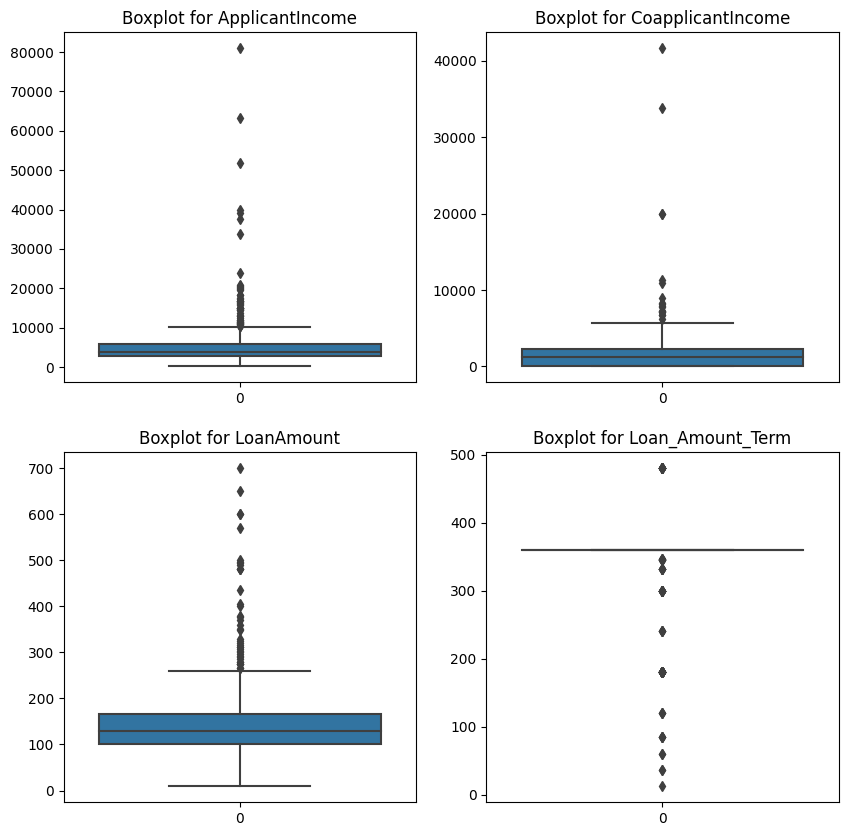

In [1047]:
plt.figure(figsize=(10,10))
pltnumber=1
for i in continous_features:
    if pltnumber<=4:
        ax=plt.subplot(2,2,pltnumber)
        sns.boxplot(continous_features[i])
        ax.set_title(f"Boxplot for {i}")
    pltnumber=pltnumber+1    

In [1048]:
continous_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
539,6417,0.0,157.0,180.0
219,4283,2383.0,127.0,360.0
185,39147,4750.0,120.0,360.0
53,4616,0.0,134.0,360.0
188,674,5296.0,168.0,360.0
...,...,...,...,...
463,5191,0.0,132.0,360.0
91,6250,5654.0,188.0,180.0
34,12500,3000.0,320.0,360.0
281,3927,800.0,112.0,360.0


# 1st we will treat outliers with box plot after this with different method

In [1049]:
def replace_outliers_with_boxplot(df, columns):
    for column in columns:
        # Calculate the IQR (Interquartile Range) for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the maximum and minimum non-outlier values
        df[column] = np.where(df[column] < lower_bound, df[column].quantile(0.05), df[column])
        df[column] = np.where(df[column] > upper_bound, df[column].quantile(0.95), df[column])
    
    return df

In [1050]:
import warnings
warnings.filterwarnings("ignore")

In [1051]:
columns_to_process = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
continous_features = replace_outliers_with_boxplot(continous_features, columns_to_process)

In [1052]:
continous_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
539,6417.0,0.0,157.0,180.0
219,4283.0,2383.0,127.0,360.0
185,14583.0,4750.0,120.0,360.0
53,4616.0,0.0,134.0,360.0
188,674.0,5296.0,168.0,360.0
...,...,...,...,...
463,5191.0,0.0,132.0,360.0
91,6250.0,5654.0,188.0,180.0
34,14583.0,3000.0,293.4,360.0
281,3927.0,800.0,112.0,360.0


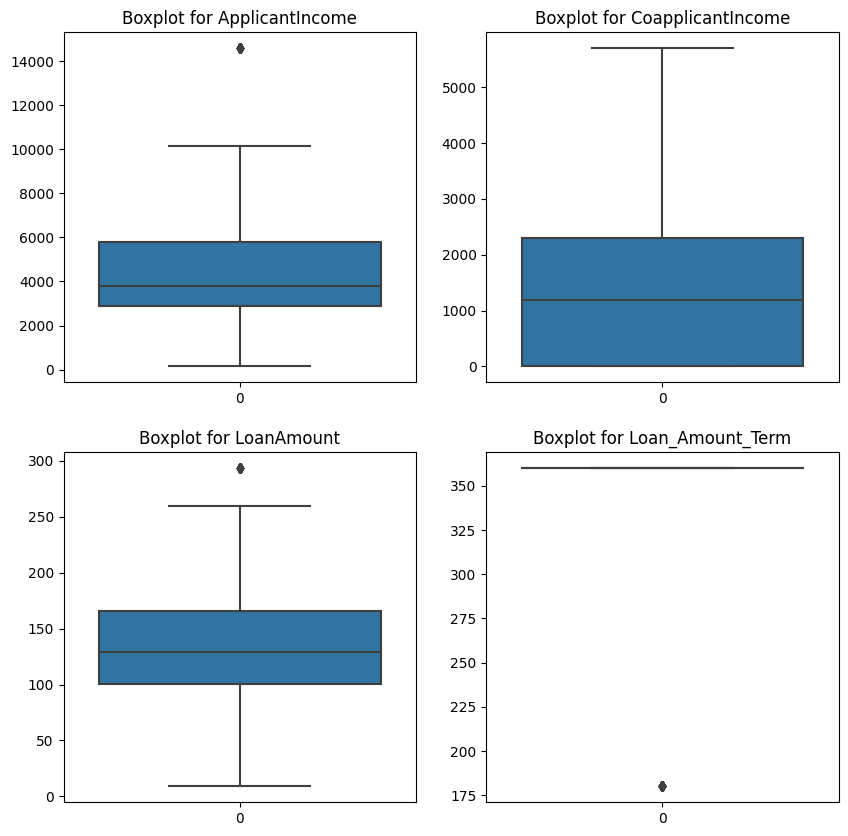

In [1053]:
plt.figure(figsize=(10,10))
pltnumber=1
for i in continous_features:
    if pltnumber<=4:
        ax=plt.subplot(2,2,pltnumber)
        sns.boxplot(continous_features[i])
        ax.set_title(f"Boxplot for {i}")
    pltnumber=pltnumber+1    

In [1054]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
539,Male,Yes,3,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural
219,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,1.0,Semiurban
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban
53,Male,Yes,2,Graduate,No,4616,0.0,134.0,360.0,1.0,Urban
188,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
463,Female,No,1,Not Graduate,Yes,5191,0.0,132.0,360.0,1.0,Semiurban
91,Male,Yes,2,Graduate,No,6250,5654.0,188.0,180.0,1.0,Semiurban
34,Male,No,3,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural
281,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban


In [1055]:
continous_features=continous_features.iloc[: , :3]

In [1056]:
x[continous_features.columns]=continous_features

<Axes: >

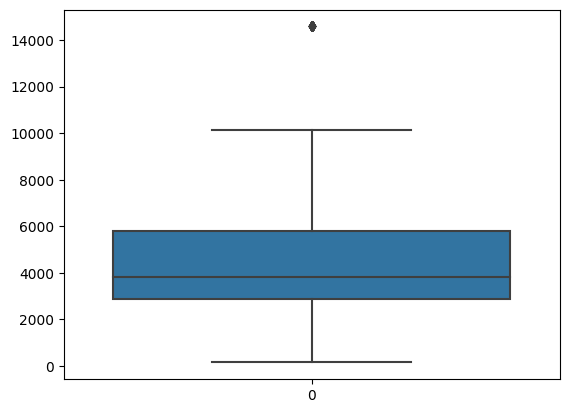

In [1057]:
sns.boxplot(x["ApplicantIncome"])

In [1058]:
# now we have x variable without outliers

In [1059]:
accuracy_o=[]
precision_o=[]
recall_o=[]
train_acc_o=[]

In [1060]:
x_train , x_test , y_train , y_test=train_test_split(x,y, test_size=0.2 , random_state=432)

In [1061]:
from sklearn.preprocessing import StandardScaler

In [1062]:
step2=StandardScaler()

In [1063]:
for i in clf:
    pipe=Pipeline([
    ("step1" , step1),
    ("step2" , step2),
    ("step3" , i)
    ])
    pipe.fit(x_train  , y_train)
    y_pred=pipe.predict(x_test)
    accuracy_o.append(accuracy_score(y_test , y_pred))
    precision_o.append(precision_score(y_test , y_pred))
    recall_o.append(recall_score(y_test , y_pred))
    y_train_pred=pipe.predict(x_train)
    train_acc_o.append(accuracy_score(y_train , y_train_pred))

In [1064]:
final=pd.DataFrame({"Algorithm":algorithm , "Accuracy_Score":accuracy_o ,"prcision_score":precision_o , "recall_score":recall_o , "Training_acc":train_acc_o}).sort_values("Accuracy_Score" , ascending=False)

In [1065]:
final

,Algorithm,Accuracy_Score,prcision_score,recall_score,Training_acc
5,BaggingClassifer,0.804878,0.795918,0.951220,0.997963
2,RandomForestClassifier,0.796748,0.787879,0.951220,0.997963
4,LogisticRegression,0.796748,0.782178,0.963415,0.826884
7,GradientBoostClassifer,0.796748,0.782178,0.963415,0.859470
1,DecisionTreeClassifer,0.780488,0.777778,0.939024,0.865580
8,XGboost,0.780488,0.789474,0.914634,0.997963
6,AdaBoostClassifer,0.772358,0.781250,0.914634,0.851324
3,KnearestNeighbor,0.756098,0.754902,0.939024,0.816701
0,SVC,0.674797,0.769231,0.731707,0.641548


In [1066]:
# There is no effect after trating outliers with boxplot method now we  train 
# now we will remove a outliers with z - score method

# outliers detections with z score method

In [1067]:
final_df["Dependents"].unique()

array(['3+', '2', '0', '1'], dtype=object)

In [1068]:
final_df["Dependents"]=final_df["Dependents"].apply(lambda x : 3 if x=="3+" else x)

In [1069]:
final_df["Dependents"]=final_df["Dependents"].astype(int)

In [1070]:
final_df["Loan_Status"]=final_df["Loan_Status"].apply(lambda x : 1 if x=="Y" else 0)

In [1071]:
continous=final_df[["ApplicantIncome"  , "CoapplicantIncome" , "LoanAmount"]]

In [1072]:
continous

,ApplicantIncome,CoapplicantIncome,LoanAmount
539,6417,0.0,157.0
219,4283,2383.0,127.0
185,39147,4750.0,120.0
53,4616,0.0,134.0
188,674,5296.0,168.0
...,...,...,...
463,5191,0.0,132.0
91,6250,5654.0,188.0
34,12500,3000.0,320.0
281,3927,800.0,112.0


<Axes: >

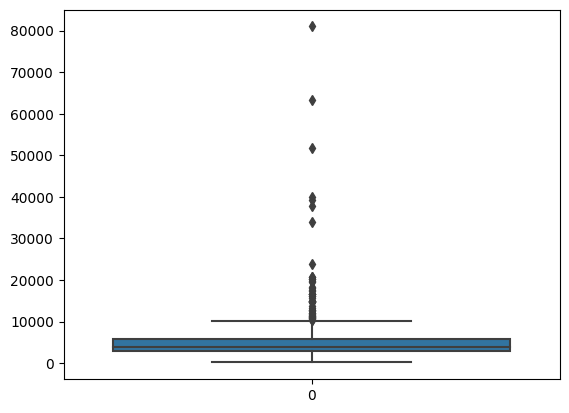

In [1073]:
sns.boxplot(continous["ApplicantIncome"])

In [1074]:
def remove(df , column):
    for col in column:
        mean=df[col].mean()
        standard=df[col].std()
        upper=mean+(3*standard)
        lower=mean-(3*standard)
        sam1=df[col]>upper
        sam2=df[col]<lower
        df.loc[sam1 , col]=upper
        df.loc[sam2 , col]=lower
    return df

In [1075]:
col=["ApplicantIncome"  , "CoapplicantIncome" , "LoanAmount"]

In [1076]:
final_df=remove(final_df , col)

In [1077]:
accuracy_z=[]
precision_z=[]
recall=[]
train_acc=[]

In [1078]:
final_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
539,Male,Yes,3,Graduate,No,6417.0,0.0,157.0,180.0,1.0,Rural,1


In [1079]:
x_train , x_test , y_train  , y_test = train_test_split(x , y , test_size=0.2 , random_state=74)

In [1080]:
for i in clf:
    pipe=Pipeline([
        ("step1" , step1),
        ("step2" , step2),
        ("step3" , i)
    ])
    pipe.fit(x_train , y_train)
    y_pred=pipe.predict(x_test)
    accuracy_z.append(accuracy_score(y_test , y_pred))
    precision_z.append(precision_score(y_test , y_pred))
    recall.append(recall_score(y_test , y_pred))
    y_pred_train=pipe.predict(x_train)
    train_acc.append(accuracy_score(y_train , y_pred_train))

In [1081]:
final=pd.DataFrame({"Algorithm":algorithm , "Accuracy_Score":accuracy_z ,"prcision_score":precision_z , "recall_score":recall , "Training_acc":train_acc}).sort_values("Accuracy_Score" , ascending=False)

In [1082]:
final

,Algorithm,Accuracy_Score,prcision_score,recall_score,Training_acc
7,GradientBoostClassifer,0.829268,0.811321,0.988506,0.851324
4,LogisticRegression,0.821138,0.803738,0.988506,0.822811
2,RandomForestClassifier,0.813008,0.813725,0.954023,0.997963
5,BaggingClassifer,0.813008,0.813725,0.954023,0.997963
6,AdaBoostClassifer,0.813008,0.807692,0.965517,0.839104
8,XGboost,0.796748,0.810000,0.931034,0.997963
1,DecisionTreeClassifer,0.772358,0.792079,0.919540,0.855397
3,KnearestNeighbor,0.772358,0.765766,0.977011,0.810591
0,SVC,0.658537,0.747253,0.781609,0.663951


# Handling imbalance Class

In [1083]:
x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
539,Male,Yes,3,Graduate,No,6417.0,0.0,157.0,180.0,1.0,Rural


In [1084]:
#step1=ColumnTransformer(transformers=([
 #   ("one_hot" , ohe , [0,1,3,4,10])   
    
#]) , remainder="passthrough")

In [1085]:
OHE=OneHotEncoder(drop='first')

In [1086]:
step5=ColumnTransformer(transformers=([
    ("ohe" , OHE , [0,1,3,4,10])
    
]) , remainder='passthrough')

In [1087]:
Pipe=Pipeline([
    ("step1",step5),
    ("step2",step2)
])

In [1088]:
Pipe.fit(x)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 1, 3, 4, 10])])),
                ('step2', StandardScaler())])

In [1089]:
x=Pipe.transform(x)

In [1090]:
x.shape , y.shape

((614, 12), (614,))

In [1091]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [1092]:
from imblearn.over_sampling import SMOTE

In [1093]:
smote = SMOTE(sampling_strategy='auto')

In [1094]:
x,y=smote.fit_resample(x , y)

In [1095]:
x.shape , y.shape

((844, 12), (844,))

In [1096]:
from sklearn.model_selection import train_test_split

In [1097]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=342)

In [1098]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [1099]:
acc=[]
pre=[]
rec=[]
tran=[]

In [1100]:
for classifier in clf:
    classifier.fit(x_train , y_train)
    y_pred=classifier.predict(x_test)
    acc.append(accuracy_score(y_test , y_pred))
    pre.append(precision_score(y_test , y_pred))
    rec.append(recall_score(y_test , y_pred))
    y_pred_train=classifier.predict(x_train)
    tran.append(accuracy_score(y_train , y_pred_train))

In [1101]:
final=pd.DataFrame({"Algorithm":algorithm , "Accuracy_Score":acc ,"prcision_score":pre, "recall_score":rec , "Training_acc":tran}).sort_values("Accuracy_Score" , ascending=False)

In [1102]:
final

,Algorithm,Accuracy_Score,prcision_score,recall_score,Training_acc
7,GradientBoostClassifer,0.828402,0.764151,0.952941,0.845926
2,RandomForestClassifier,0.822485,0.823529,0.823529,1.000000
6,AdaBoostClassifer,0.822485,0.789474,0.882353,0.823704
5,BaggingClassifer,0.816568,0.829268,0.800000,1.000000
8,XGboost,0.816568,0.813953,0.823529,0.997037
1,DecisionTreeClassifer,0.775148,0.711712,0.929412,0.773333
3,KnearestNeighbor,0.745562,0.738636,0.764706,0.854815
4,LogisticRegression,0.745562,0.690909,0.894118,0.722963
0,SVC,0.585799,0.592593,0.564706,0.539259


# GridSearch CV for Random Forest Classifier

In [1103]:
from sklearn.model_selection import GridSearchCV

In [1104]:
param_grid = {
    'n_estimators': [10, 20, 30,40,50,60,70,80,90,100],
    'max_depth': [ 15,16,17,18,19, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [1105]:
rf = RandomForestClassifier()

In [1106]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [1107]:
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [1108]:
best_params

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 80}

In [1109]:
best_model

RandomForestClassifier(max_depth=20, n_estimators=80)

In [1110]:
grid_search.best_score_

0.8222222222222222

# Grid Search CV on Xgboost

In [1111]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
xgb=XGBClassifier(n_estimators=25 ,random_state=2 , alpha= 0.1 ,reg_lambda=1.0 ,subsample= 0.85 , colsample_bytree=0.8)

In [1112]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

In [1113]:
params = {
    'alpha': 0.1,  # L1 regularization
    'lambda': 1.0  # L2 regularization
}

In [1114]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1115]:
import xgboost as xgb
from xgboost import XGBClassifier

In [1116]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test)

In [1117]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',  # Use appropriate evaluation metric
    'max_depth': 3,  # Set other hyperparameters as needed
    'eta': 0.1,       # Learning rate
}
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 1000  # A large number of rounds
bst = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=10, verbose_eval=True)

[0]	train-logloss:0.65865	eval-logloss:0.65839
[1]	train-logloss:0.63031	eval-logloss:0.63001
[2]	train-logloss:0.60665	eval-logloss:0.60525
[3]	train-logloss:0.58678	eval-logloss:0.58454
[4]	train-logloss:0.56984	eval-logloss:0.56727
[5]	train-logloss:0.55467	eval-logloss:0.55282
[6]	train-logloss:0.54221	eval-logloss:0.54029
[7]	train-logloss:0.53028	eval-logloss:0.53043
[8]	train-logloss:0.52009	eval-logloss:0.52393
[9]	train-logloss:0.50969	eval-logloss:0.51544
[10]	train-logloss:0.50171	eval-logloss:0.50851
[11]	train-logloss:0.49458	eval-logloss:0.50462
[12]	train-logloss:0.48811	eval-logloss:0.49962
[13]	train-logloss:0.48212	eval-logloss:0.49554
[14]	train-logloss:0.47687	eval-logloss:0.49177
[15]	train-logloss:0.47116	eval-logloss:0.48794
[16]	train-logloss:0.46691	eval-logloss:0.48585
[17]	train-logloss:0.46303	eval-logloss:0.48522
[18]	train-logloss:0.45860	eval-logloss:0.48266
[19]	train-logloss:0.45542	eval-logloss:0.48155
[20]	train-logloss:0.45251	eval-logloss:0.47959
[2

In [1118]:
y_pred = bst.predict(dval)

# You can use a threshold to convert probabilities to binary predictions
threshold = 0.5
y_pred_binary = [1 if p > threshold else 0 for p in y_pred]

In [1119]:
accuracy_score(y_pred_binary , y_test)

0.7928994082840237

In [1120]:
xgb=XGBClassifier(n_estimators=25 ,random_state=2 , alpha= 0.1 ,reg_lambda=1.0) # This Is a Final Model will use 

In [1121]:
xgb.fit(x_train , y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test , y_pred)

0.8284023668639053

In [1122]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,135.0,360.0,1.0,Urban,Y


In [1123]:
a=Pipe.transform([["Male" ,"No",0,"Graduate" ,"No" ,5849 ,0.0 ,135.0 , 360.0 ,1.0 , "Urban"]])

In [1124]:
import pickle

In [1125]:
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [1126]:
with open('transformer.pkl', 'wb') as file:
    pickle.dump(Pipe, file)

In [1127]:
import joblib

joblib.dump(Pipe, 'my_pipeline.pkl')

['my_pipeline.pkl']

In [1128]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.61      0.70        84
           1       0.69      0.88      0.78        85

    accuracy                           0.75       169
   macro avg       0.77      0.74      0.74       169
weighted avg       0.76      0.75      0.74       169

[[51 33]
 [10 75]]
LR accuracy: 74.56%


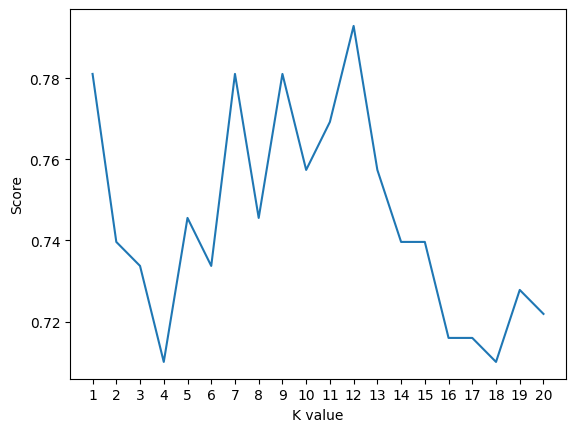

KNN best accuracy: 79.29%


In [1129]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [1130]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73        84
           1       0.71      0.94      0.81        85

    accuracy                           0.78       169
   macro avg       0.81      0.77      0.77       169
weighted avg       0.81      0.78      0.77       169

[[51 33]
 [ 5 80]]
SVC accuracy: 77.51%


In [1132]:
from sklearn.naive_bayes import GaussianNB

In [1133]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)

y_pred = NBclassifier2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69        84
           1       0.68      0.98      0.80        85

    accuracy                           0.76       169
   macro avg       0.82      0.76      0.74       169
weighted avg       0.82      0.76      0.74       169

[[45 39]
 [ 2 83]]
Gaussian Naive Bayes accuracy: 75.74%


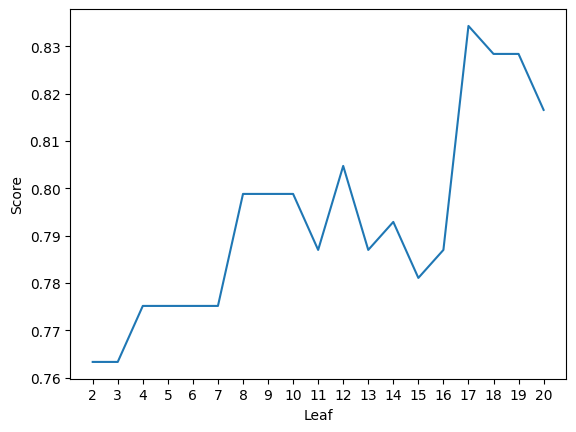

Decision Tree Accuracy: 83.43%


In [1134]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

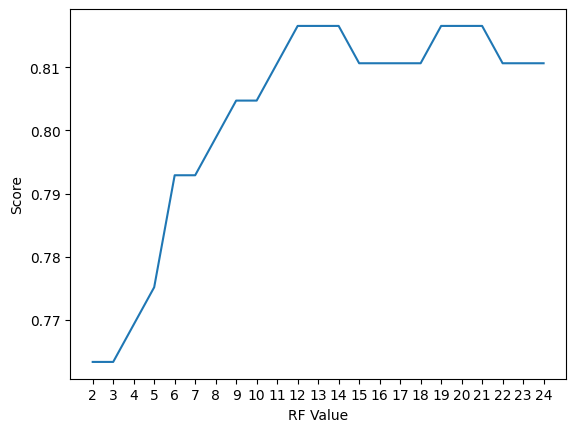

Random Forest Accuracy:  81.66%


In [1135]:
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [1136]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [1137]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1138]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(x_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [1139]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=20, n_estimators=300,
                           subsample=1)
0.7940730837789661
{'subsample': 1, 'n_estimators': 300, 'max_leaf_nodes': 20, 'max_depth': 5}
0


In [1140]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        84
           1       0.81      0.84      0.82        85

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169

[[67 17]
 [14 71]]
Gradient Boosting accuracy: 81.66%
